In [1]:
#Part 1 of code for my DSA Project on COVID-19 and its effects
#Dhruv Gupta
#EP17BTECH11006@IITH.AC.IN
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import pandas
import csv

In [2]:
#defining hill function
def hill(T,A,K,m):
    return A*(T**m)/(K+(T**m));

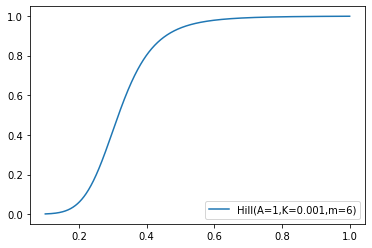

In [3]:
#Generating sample plot
x=np.linspace(0.1,1,1000)
plt.plot(x,hill(x,1,0.001,6),label='Hill(A=1,K=0.001,m=6)')
plt.legend()

In [4]:
#Extracting data for analysis
gl_cases=pandas.read_csv('time_series_covid19_confirmed_global.csv', index_col=False)
ctry=['US','Italy','China','France','Iran','United Kingdom','Korea, South','India']
#Filtering countries of concern
filt=gl_cases['Country/Region'].isin(ctry)
ctry=gl_cases[filt].loc[:,'Country/Region'].to_numpy()
cases=(gl_cases[filt].loc[:,'1/22/20':]).to_numpy()
tot_cases=gl_cases.loc[:,'1/22/20':].sum().to_numpy()
#Generating date range
date_r=gl_cases.columns[3:].to_numpy()

In [5]:
#Calculating normalized cases to prevent overflow of function
norm_cases=[]
for i in range(len(ctry)):
    norm_cases.append(cases[i]/cases[i].max())

In [6]:
#Storing optimized parameters for all countries' data
dates=np.linspace(0.1,1,68)
param=[]
for i in range(len(ctry)):
    [A,K,m],pcov=curve_fit(hill, dates,norm_cases[i])
    param.append([A,K,m])

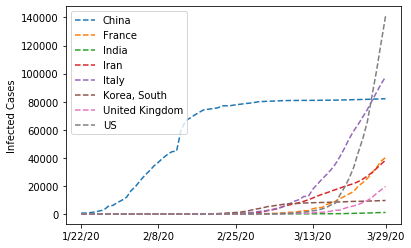

In [7]:
#Sample Plot for cases in countries
for i in range(len(ctry)):
    plt.plot(date_r,cases[i],'--',label=ctry[i])
plt.xticks(ticks=[0,17,34,51,67])
plt.ylabel('Infected Cases')
plt.legend() 

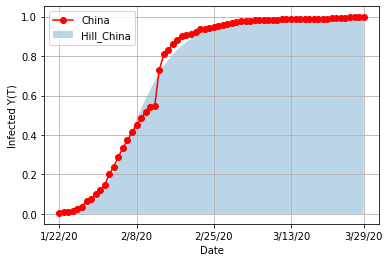

In [8]:
#To generate plot for certain country change index i between 0 to 7, corresponding to the country of concern
i=0
fit=hill(dates,*param[i])
plt.fill_between(dates,0,fit,alpha=0.3,label='Hill_'+ctry[i])
plt.plot(dates,norm_cases[i],'ro-',label=ctry[i])
plt.xticks([0.1, dates[17], dates[34], dates[51], 1.],
           [date_r[0], date_r[17], date_r[34], date_r[51], date_r[67]])
plt.xlabel('Date')
plt.ylabel('Infected Y(T)')
plt.grid()
plt.legend()